1. Importando pacotes necessários

In [22]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import freeman
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

2. Carregando a rede existente no arquivo .gml para uma variavel.

In [21]:
g = freeman.load('network.gml')

3. Leitura do arquivo csv de todas as aparições de rebatedores ao prato e tambem eliminando repeticao de rebatedores atraves do metodo `unique`.

In [3]:
atbats = pd.read_csv('atbats.csv')
pitchers = atbats.pitcher_id.unique()

4. Leitura dos dados sobre arremessadores.

In [32]:
pitcher_data = pd.read_csv('pitcher_data.csv')

5. Usando a biblioteca `networkx` e calculado as centralidades de `betweenness`, `degree` e `closeness` da rede previamente carregada a partir do .gml.

In [5]:
bc = nx.betweenness_centrality(g) #13
dc = nx.degree_centrality(g)
cc = nx.closeness_centrality(g)

6. Criacao de um dicionario o qual possui como chave o identificador do arremessador e valor um objeto com seu `betweness`, `degree` e `closeness`.

Exemplo de um item do dicionario: 

In [ ]:
dict_exemplo = {
    'id_arremessador': {
        'betweness': 'x',
        'degree': 'y',
        'closeness': 'z'
    }
}

In [6]:
pitcher_metrics = {}
for pitcher in pitchers:
    pitcher_metrics[pitcher] = {
        'betweness': bc[pitcher],
        'degree': dc[pitcher],
        'closeness': cc[pitcher]
    }

7. Criacao de um data frame com as seguintes colunas: `pitcher_id`(id do arremessador), `betweness`(betweness do arremessador), `degree`(degree do arremessador) e `closeness`(closeness do arremessador)
para melhor exploracao das variaveis

In [7]:
data = pd.DataFrame({
    'pitcher_id': [n for n in pitcher_metrics.keys()],
    'betweness': [n['betweness'] for n in pitcher_metrics.values()],
    'degree': [n['degree'] for n in pitcher_metrics.values()],
    'closeness': [n['closeness'] for n in pitcher_metrics.values()]
})

8. Histograma dos betwenesses

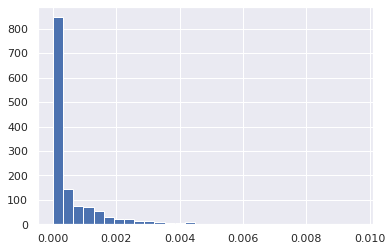

In [8]:
plt.hist(data.betweness, bins=30);

9. Histograma dos degrees

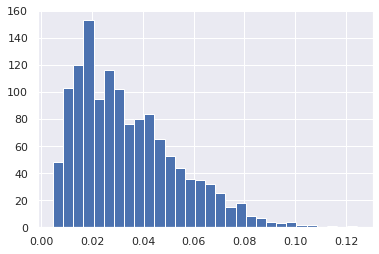

In [9]:
plt.hist(data.degree, bins=30);

10. Histograma dos closenesses

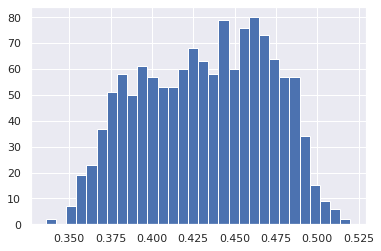

In [10]:
plt.hist(data.closeness, bins=30);

11. Histograma das variaveis WHIP e ERA

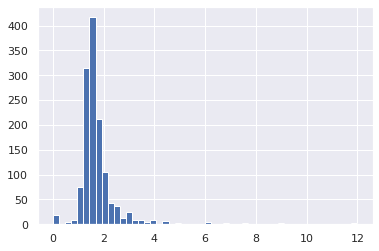

In [15]:
plt.hist(pitcher_data.WHIP, bins=50); #32

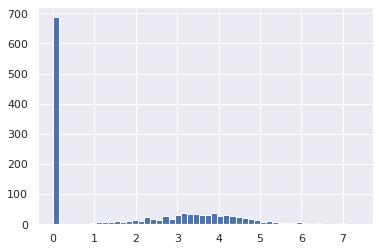

In [33]:
plt.hist(pitcher_data.cERA, bins=50); #32

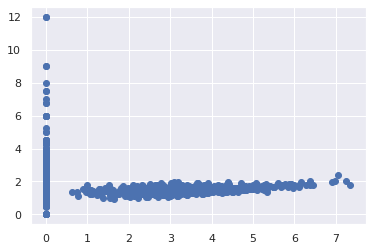

In [38]:
plt.scatter(pitcher_data.cERA, pitcher_data.WHIP);

12. Juncao dos data frames de arremessadores e variaveis calculadas atraves do networkx atraves do id do arremessador.

In [34]:
merged = pd.merge(data, pitcher_data, on=['pitcher_id'], how='inner')
merged = merged[['WHIP', 'closeness', 'degree', 'betweness', 'cERA']]

13. Iteracao entre os dados para normalizar os dados.

In [35]:
for column in merged.columns:
    max_value = merged[column].max()
    min_value = merged[column].min()
    merged[column] = (merged[column] - min_value)/(max_value - min_value)

14. Regressao linear entre as variaveis dependentes WHIP e ERA e as idependentes: `closeness`, `degree`, `betweness`, para verificar a correlacao entre estas.

In [36]:
model = sm.OLS(merged['WHIP'], merged[['closeness', 'degree', 'betweness']], missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cERA   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              512.0
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                   6.26e-221
Time:                        01:16:24   Log-Likelihood:                          23.314
No. Observations:                1329   AIC:                                     -40.63
Df Residuals:                    1326   BIC:                                     -25.05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
closeness      0.1811      0.074      2.463      0.014       0.037       0.325
degree         0.7897      0.188      4.197      0.000       0.421       1.159
betweness     -0.9398      0.188     -5.010      0.000      -1.308      -0.572
==============================================================================
Omnibus:                       93.607   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.215
Skew:                           0.715   Prob(JB):                     2.60e-25
Kurtosis:                       3.000   Cond. No.                         26.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model = sm.OLS(merged['cERA'], merged[['closeness', 'degree', 'betweness']], missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   cERA   R-squared (uncentered):                   0.537
Model:                            OLS   Adj. R-squared (uncentered):              0.536
Method:                 Least Squares   F-statistic:                              512.0
Date:                Thu, 05 Nov 2020   Prob (F-statistic):                   6.26e-221
Time:                        01:19:18   Log-Likelihood:                          23.314
No. Observations:                1329   AIC:                                     -40.63
Df Residuals:                    1326   BIC:                                     -25.05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
closeness      0.1811      0.074      2.463      0.014       0.037       0.325
degree         0.7897      0.188      4.197      0.000       0.421       1.159
betweness     -0.9398      0.188     -5.010      0.000      -1.308      -0.572
==============================================================================
Omnibus:                       93.607   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.215
Skew:                           0.715   Prob(JB):                     2.60e-25
Kurtosis:                       3.000   Cond. No.                         26.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""